In [1]:
from gensim.models import FastText
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fasttext

In [2]:
corpus_fname = 'natapann_data.txt'
model_fname = 'fasttext'


print('corpus 생성')
corpus = [sent.strip().split(" ")for sent in tqdm(open(corpus_fname, 'r', encoding='utf-8').readlines())]

print("학습 중")
model = FastText(corpus, vector_size=100, window=5, min_count=5, workers=4, sg=1)
model.save(model_fname)
print('완료')

 86%|███████████████████████████████████████████████████████████████▋          | 9201/10700 [00:00<00:00, 91346.06it/s]

corpus 생성


100%|█████████████████████████████████████████████████████████████████████████| 10700/10700 [00:00<00:00, 93293.56it/s]


학습 중
완료


In [3]:
loaded_model = FastText.load("fasttext")
print(model.wv.vectors.shape)

(17036, 100)


In [4]:
a = []

with open('extract_words.txt','r') as word:
    datafile = word.readlines()
    for i in range(len(datafile)):
        print(datafile[i].strip())
        a.append(datafile[i].strip())
        
a

재난지원금
엔시티
투바투
스트릿우먼파이터
스우파


['재난지원금', '엔시티', '투바투', '스트릿우먼파이터', '스우파']

In [5]:
print(loaded_model.wv.most_similar(a[4], topn=10))

[('리정', 0.9848453998565674), ('로잘린', 0.9847720265388489), ('노제', 0.9819465279579163), ('강혜원', 0.9804621934890747), ('안유진', 0.9794530868530273), ('이채연', 0.9786624908447266), ('ㄹㅈㄷ', 0.9771316647529602), ('민아', 0.9755376577377319), ('티저', 0.9751332998275757), ('미쳤다', 0.9745118021965027)]


In [6]:
t = []
t = loaded_model.wv.most_similar(a[4], topn=10)

for i in range(len(t)):
    print(t[i][0])

리정
로잘린
노제
강혜원
안유진
이채연
ㄹㅈㄷ
민아
티저
미쳤다


In [7]:
for i in range(len(a)):
    t=[]
    print(">>",a[i])
    t = loaded_model.wv.most_similar(a[i], topn=10)
    for j in range(len(t)):
        print(t[j][0])
    print("\n")

>> 재난지원금
재난지원금을
어거지로
쓸데없는
별별
사지
지능이
옳지
화만
인간은
참는


>> 엔시티
엔시티드림
세븐틴
엔시티랑
세븐틴은
엔시티는
불편하면
엔하이픈
에스에프나인
에셒구
세븐틴이


>> 투바투
에이티니
엔시티
엔하이픈
에셒구
투바투가
더보이즈
골차
에이티즈는
비투비
엔시티드림


>> 스트릿우먼파이터
후이
원스
코카앤버터
야오치
파이터
저스틴비버
투샷
우주호
에스쿱스
피치스


>> 스우파
리정
로잘린
노제
강혜원
안유진
이채연
ㄹㅈㄷ
민아
티저
미쳤다




In [8]:
import re
import io
import json
import csv
import openpyxl
import pandas as pd
import numpy as np
import kss
import ast
from konlpy.tag import Komoran
from IPython.core.display import display, HTML
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

#한글 꺠짐 처리
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
def extract_word(fkey,key):
    final = pd.DataFrame(columns = ['contents'])

    f = pd.read_csv('natepann_data.csv')

    is_key = (f['본문'].str.contains(fkey, na=False) | f['제목'].str.contains(fkey, na=False)) & (f['본문'].str.contains(key, na=False) | f['제목'].str.contains(key, na=False))

    f_key = f[is_key]
    f_key = f_key.reset_index()
    print(f_key)

    final_key = pd.DataFrame(columns = ['tokenized'])

    komoran = Komoran()

    for i in range(len(f_key)):
        try:
            st = f_key.loc[i, '제목']
            final_key.loc[i, 'tokenized'] = str(st)
            ct = f_key.loc[i, '본문']
            final_key.loc[i, 'tokenized'] += str(ct)

        except KeyError:
            print("error")

    keyword_content = pd.DataFrame(columns = ['content','positive', 'negative', 'neutral'])


    for i in range(len(final_key)):
        try:
            fc = final_key.loc[i, 'tokenized']

            if i == 0:
                keyword_content.loc[0,'content'] = fc
            else:
                keyword_content.loc[0,'content'] += fc

        except KeyError:
            print("error")

    keyword_content

    # 감성사전에서 감성분석
    f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
    lines = f.readlines()

    score_dict = []

    for line in lines:
        line_splited = line.split()
        score = int(line_splited[-1])
        word = ''
        for frac in line_splited[:-1]:
            word = word + ' ' + frac

        word = word[1:]
        score_dict.append([word, score])

    keyword_content['positive'] = 0
    keyword_content['negative'] = 0
    keyword_content['neutral'] = 0

    if keyword_content.empty:
        print("사전과 비교할 조건에 맞는 내용 없음")

    else:
        keyword_content.loc[0, 'content'] = str(komoran.nouns(keyword_content.loc[0, 'content']))


        stopwords = ['하다', '없다', '있다', '되다', '아니다', '같다', '이다', '않다', '그렇다', 
                     '이렇다', '싶다', '다', '것', '그', '이', '거', '니다']


        pos_list = ast.literal_eval(keyword_content.loc[0, 'content'])

        final = []

        for j in range(len(pos_list)):
            if pos_list[j] not in stopwords:
                final.append(pos_list[j])

        keyword_content.loc[0, 'content'] = str(final)

        # 감성사전에서 감성분석
        f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
        lines = f.readlines()

        score_dict = []

        for line in lines:
            line_splited = line.split()
            score = int(line_splited[-1])
            word = ''
            for frac in line_splited[:-1]:
                word = word + ' ' + frac

                word = word[1:]
                score_dict.append([word, score])

        keyword_content.insert(0, "Keyword", key)

        tokens = ast.literal_eval(keyword_content.loc[0, 'content'])

        try:
            for token in tokens:
                for dict_word in score_dict:
                    if dict_word[0] == token:
                        if dict_word[1] > 0:
                            keyword_content.loc[0, 'positive'] += dict_word[1]
                        elif dict_word[1] < 0:
                            keyword_content.loc[0, 'negative'] += dict_word[1]
                        else:
                            keyword_content.loc[0, 'negative'] += 1 #중립어는 개수 세기    
        except KeyError:
            print("error")

    print("연관 단어 :" + fkey)
    print(keyword_content[keyword_content.columns.difference(['content'])])
    pos.append(keyword_content[keyword_content.columns.difference(['content'])].loc[0,'positive'])
    neg.append(keyword_content[keyword_content.columns.difference(['content'])].loc[0,'negative'])
    neu.append(keyword_content[keyword_content.columns.difference(['content'])].loc[0,'neutral'])

In [10]:
def NLP(a,b,c) :
    pos = a
    neg = b
    nneg = str(neg).replace("-", "")

    size = [pos, nneg]

    label = ['Positive','Negative']

    plt.axis('equal')
    plt.pie(x=size, labels=label, autopct='%.2f%%')

    plt.title("연관 명사 : " + fkey)
    plt.legend(loc="upper right")
    plt.show()


    p = pos / (pos + int(nneg))*100
    n = int(nneg) / (pos + int(nneg))*100
    total = p - n

    if total <= 10 and total >= -10:
        Senti = 0
    elif total < -10 and total >= -50:
        Senti = -1
    elif total < -50:
        Senti = -2
    elif total > 10 and total<= 50:
        Senti = 1
    elif total > 50:
        Senti = 2

    print(str(fkey) + "의 극성값 = " + str(Senti))

    # print("예시 문장 1: " + f_key.loc[0, '본문'])
    # print("예시 문장 2: " + f_key.loc[2, '본문'])

    index                     제목  \
0    9215      태용 스우파 심사 일반인들 반응   
1    9227       스우파 노제는 예쁜게 죄다ㅜㅜ   
2    9235           스우파 나만 이해안되나   
3    9284        솔직히 그냥 넘어가면 안돼지   
4    9409           이거 로잘린 과거 맞아   
5    9443           스우파 출연진들 닮은꼴   
6    9460            스우파 비주얼 삼대장   
7    9646      여돌 그룹별 남덕몰이멤여덕몰이멤   
8    9745       스우파 댄서들 현재 활동 상황   
9    9770   스우파 이상하게 과몰입하는 애들때문에   
10   9908         스우파 웨이비 탈락 된 거   
11   9922         스우파 제작진들이 노제한테   
12   9926        헐 이사배가 노제 커버한거봄   
13   9945       메가크루 미션 누가 제일 좋음   
14  10042   스우파 댄서들 이름 다 센스있지 않음   
15  10090  걸플이 빅스가 만든 무대 그대로 표절함   
16  10112            에이티즈 세계관 붕괴   
17  10194           흥미로운 사실 알려줄게   
18  10245      아이돌 위버스 놀이추석인사 버전   
19  10445          너희는 집에서 다이소까지   
20  10453    같은 머리하고 춤 춘 모니카랑 노제   

                                                   본문  
0   심사평도 드럽게 못해서 통편집당하는데 비출때마다 헛소리만해서 욕만 바가지로 먹는중리...  
1   여적여 봐라 심지어 노제가 소속이라는 되도 않는 루머까지 만들어서 까고 있음ㅋㅋㅋㅋ...  
2   리더 계급 메인댄서 선발전에서 리정이 상체 흔들림 없이 깔끔하게

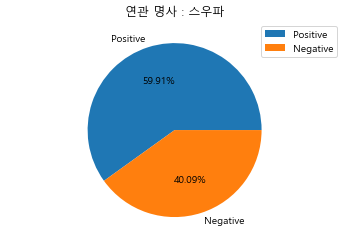

스우파의 극성값 = 1


In [11]:
# 1회 실행
pos = []
neg = []
neu = []

for i in range(len(t)):
    try:
        fkey = a[4]
        key = t[i][0]
        extract_word(fkey,key)
    except:
        print("사전과 비교할 조건에 맞는 내용 없음")
        
NLP(sum(pos),sum(neg),sum(neu))

>> 재난지원금
   index                          제목  \
0   6747           아니 왜자꾸 자영업자들만 돈주냐   
1   9813  저희를 너무 비참하게 만드는 동서네 너무 싫네요   

                                                  본문  
0  자영업자들만 국민이냐  왜자꾸 재난지원금을 자영업자만 주냐고 나도 세금  겁나 뜯기...  
1  이런 반복되는 상황을 남편은 그저 어쩔 수 없는 걸로 시부모님은 제 팔자 탓을 하고...  
연관 단어 :재난지원금
  Keyword  negative  neutral  positive
0  재난지원금을      -122        0         8
재난지원금을
Empty DataFrame
Columns: [index, 제목, 본문]
Index: []
사전과 비교할 조건에 맞는 내용 없음
연관 단어 :재난지원금
Empty DataFrame
Columns: [negative, neutral, positive]
Index: []
사전과 비교할 조건에 맞는 내용 없음
   index                          제목  \
0   9813  저희를 너무 비참하게 만드는 동서네 너무 싫네요   

                                                  본문  
0  이런 반복되는 상황을 남편은 그저 어쩔 수 없는 걸로 시부모님은 제 팔자 탓을 하고...  
연관 단어 :재난지원금
  Keyword  negative  neutral  positive
0    쓸데없는      -120        0         8
쓸데없는
Empty DataFrame
Columns: [index, 제목, 본문]
Index: []
사전과 비교할 조건에 맞는 내용 없음
연관 단어 :재난지원금
Empty DataFrame
Columns: [negative, neutral, positive]
Index: []

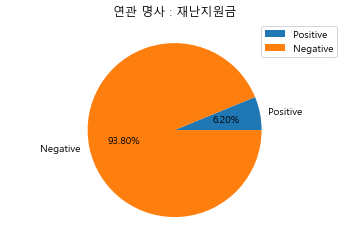

재난지원금의 극성값 = -2


>> 엔시티
    index                             제목  \
0    2241                 엔시티드림  세븐틴 상상도   
1    2248           내가 들으려고 끼적여놓은 플레이리스트   
2    2268                      육아주식 성공한    
3    3879                   나만큼 케이팝철새 있냐   
4    4449              드림팬들은 참 고마움을 모르는듯   
5    5088          남돌 힛 상위권 뚫는거랑 차트인 유지가   
6    5419                   자기본진 남친짤 풀어줘   
7    5758                   인생이 힘들다 부탁할게   
8    5944                  드림콘서트 레드카펫 모음   
9    6194         긍까 데키라에서 엔시티드림 태도논란이라고   
10   6398           최근 성적으로 세대 이후 남돌 군정리   
11   6444             최근 성적으로 남돌 군 정리해준다   
12   6711         엔시티  방탄소년단 앨범 구매연령대 비교   
13   8036  엔시티 마크랑 레드벨벳 조이 뭔가 연애하는것같지 않아   
14   9904          모두드루와이 소속사 진짜 왜 이러는거임   
15  10400               엔시티드림 엔시티 앨범 판매량   

                                                   본문  
0    재밌을 거 같아서 정말 장난으로 재미로 쓰는 글이야 나재민 윤정한 글 보고 뽕차서...  
1    케이팝사랑하는 인이 만들어봄 걍 최대한 편파 안 되게 넣어봄 슈스엠하다가 만들어봄...  
2   현 엔시티드림 전 아기신기 아기신기는 다섯명이고 어린데 잘해서 슴직원들이 붙여준 별...  
3 

연관 단어 :엔시티
  Keyword  negative  neutral  positive
0  에스에프나인      -259        0       189
에스에프나인
   index                            제목  \
0   2125                     하 탈덕 할랬다가   
1   3504                벅차오르는 노래 추천해주랑   
2   3519             이런 기사사진 같은 거 좀 주라   
3   7490  얘들아 너넨 본진 연차 많이 쌓이거나 해체하고 나서   

                                                  본문  
0  나머지 멤들 보고 참는다 흐린눈 ㅈㄴ 하고싶은데 얘네 하면 관계성이라 안 볼래야 안...  
1  막 애니 주제곡처럼 마냥 일렉기타 소리 있는 그런 거 말구아련하게 벅차오르는그런 거...  
2  이런 식으로 제목으로 주접 떠는 거 주라 ㅜㅜ 어떤 그룹이든 상관없음서치걸게 ㅜㅜ ...  
3  돌팬드라 니네 본진들이 연차 많이 쌓이고 나서 부업으로 뭐 했으면 좋겠어 아님 뭐가...  
연관 단어 :엔시티
  Keyword  negative  neutral  positive
0     에셒구        -2        0         2
에셒구
   index                   제목  \
0    409        남돌들 팬덤 특징 적어봄   
1    410   돌팬들을 위한 대학교 싸강 배경들   
2   3218  여러 아이돌 진짜 웃긴 영상 추천좀   
3   4615  대중성 세븐틴이 많아 엔시티가 많아   

                                                  본문  
0  방탄  유입이 엄청 많음 그냥 대중들도 그렇고 학생들도 그렇고 인지도가 가장 높으니...  
1  ㄴ글을 쓰게된 이유스엠 연습실세븐틴이 브이앱 하는 장소엔시티 도영 방더보이즈 브이앱

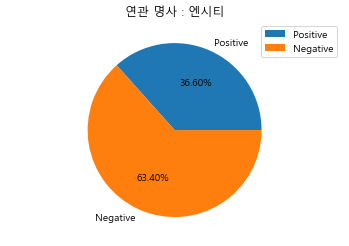

엔시티의 극성값 = -1


>> 투바투
   index        제목                                                 본문
0   8525  야들아 남돌중에  남돌중에평소 성격이 쿨한 사람 있냐근데 또 말이 너무 많으면 안됨생각이 너무 어리면...
연관 단어 :투바투
  Keyword  negative  neutral  positive
0    에이티니       -16        0         6
에이티니
     index                       제목  \
0       98              톡선 제왑글 반박할게   
1      167        최애에게 설렜던 순간 적고가보자   
2      306               현재 남돌 정리하면   
3      316     그래서 스키즈팬들은 학폭 현진 안고감   
4      370               남돌 여돌 군 정리   
..     ...                      ...   
235  10584  얘네 이번 노래 왜케 방탄 따라한 것 같지   
236  10614    솔직히 여적여 팬덤 순위는 씹즈니 아님   
237  10628                  인싸되는 방법   
238  10673     시간을달려서뚜두 뭐가 더흥행했다생각함   
239  10683         본진 영화나 드라마 짤털해주라   

                                                    본문  
0    지금 저 글은 전범기업 딸 옹호한다는 프레임 씌워서 선동할려는거 같은데 밑에 이거보...  
1    ㅈㄱㄴ 최애에게 가장 설렜던 순간 또는 일화 적고가자 단순한 사진 한 장이어도 좋음...  
2    군 방탄 엑소 세븐틴군 엔시티 투바투군 더보이즈 스키즈군 엡식 골든차일드 아스트로군...  
3    다른멤버들은 무슨죄야더보이즈 영훈 주연 위너 엔하이픈 선우 희승 니키 제이

연관 단어 :투바투
  Keyword  negative  neutral  positive
0   엔시티드림       -29        0        12
엔시티드림


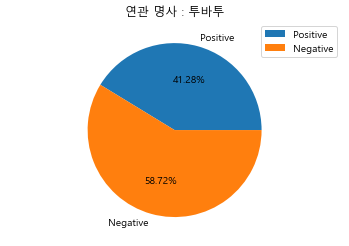

투바투의 극성값 = -1


>> 스트릿우먼파이터
Empty DataFrame
Columns: [index, 제목, 본문]
Index: []
사전과 비교할 조건에 맞는 내용 없음
연관 단어 :스트릿우먼파이터
Empty DataFrame
Columns: [negative, neutral, positive]
Index: []
사전과 비교할 조건에 맞는 내용 없음
Empty DataFrame
Columns: [index, 제목, 본문]
Index: []
사전과 비교할 조건에 맞는 내용 없음
연관 단어 :스트릿우먼파이터
Empty DataFrame
Columns: [negative, neutral, positive]
Index: []
사전과 비교할 조건에 맞는 내용 없음
   index                제목                                                 본문
0   9409      이거 로잘린 과거 맞아  몇살때야 스우파 스트릿우먼파이터 엠넷 홀리뱅 코카앤버터 원트 라치카  프라우드먼 훅...
1   9945  메가크루 미션 누가 제일 좋음  난 라치카언니들 진짜 조카 멋있어특히 가비언니 립싱크 보고 기절할뻔ㅅㅊㅇ스트릿우먼파...
2  10194      흥미로운 사실 알려줄게  사실 우리 방구 낄때 똥도 극소량씩 나옴 방구는 똥가루야레드벨벳 슬기 웬디 아이린 ...
연관 단어 :스트릿우먼파이터
  Keyword  negative  neutral  positive
0   코카앤버터        -8        0        14
코카앤버터
   index            제목                                                 본문
0  10194  흥미로운 사실 알려줄게  사실 우리 방구 낄때 똥도 극소량씩 나옴 방구는 똥가루야레드벨벳 슬기 웬디 아이린 ...
연관 단어 :스트릿우먼파이터
  Keyword  negative  neutral  positive
0     야오치

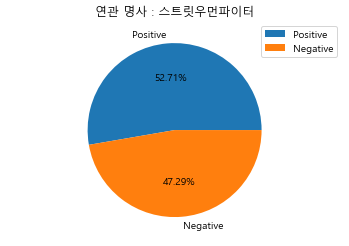

스트릿우먼파이터의 극성값 = 0


>> 스우파
    index                           제목  \
0    9215            태용 스우파 심사 일반인들 반응   
1    9235                 스우파 나만 이해안되나   
2    9284              솔직히 그냥 넘어가면 안돼지   
3    9409                 이거 로잘린 과거 맞아   
4    9557           솔직히  떨어지면 이유는 단 하나   
5    9563  너네 스우파 댄서들중에 춤 제일 취향인사람 누구임   
6    9646            여돌 그룹별 남덕몰이멤여덕몰이멤   
7    9770         스우파 이상하게 과몰입하는 애들때문에   
8    9926              헐 이사배가 노제 커버한거봄   
9    9945             메가크루 미션 누가 제일 좋음   
10  10042         스우파 댄서들 이름 다 센스있지 않음   
11  10132                 는 갈수록 한계 느껴짐   
12  10194                 흥미로운 사실 알려줄게   
13  10444                   스우파 화 예고 봄   
14  10445                너희는 집에서 다이소까지   

                                                   본문  
0   심사평도 드럽게 못해서 통편집당하는데 비출때마다 헛소리만해서 욕만 바가지로 먹는중리...  
1   리더 계급 메인댄서 선발전에서 리정이 상체 흔들림 없이 깔끔하게 너무 잘한 것 같은...  
2   끌올 ㅅㅊ 방탄소년단 정국 지민 뷔 세븐틴 블랙핑크 제니 로제 지수 이달의소녀 레드...  
3   몇살때야 스우파 스트릿우먼파이터 엠넷 홀리뱅 코카앤버터 원트 라치카  프라우드먼 훅...  
4   넘 잘난거 뿐임 ㅠㅠㅋㅋㅋㅋㅋ

사전과 비교할 조건에 맞는 내용 없음
연관 단어 :스우파
Empty DataFrame
Columns: [negative, neutral, positive]
Index: []
사전과 비교할 조건에 맞는 내용 없음


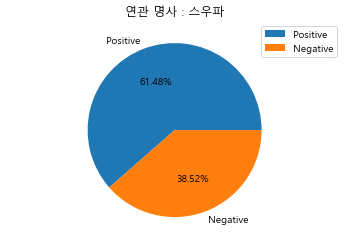

스우파의 극성값 = 1




In [11]:
# 전체 실행
for i in range(len(a)):
    pos = []
    neg = []
    neu = []
    t=[]
    print(">>",a[i])
    t = loaded_model.wv.most_similar(a[i], topn=10)
    fkey=a[i]
    for j in range(len(t)):
        try:
            key=t[j][0]
            extract_word(fkey,key)
            print(t[j][0])
        except:
            print("사전과 비교할 조건에 맞는 내용 없음")
    NLP(sum(pos),sum(neg),sum(neu))
    print("\n")

# 각 연관 단어 1:1 사전 비교 극성값

각 단어별 사전과 비교시 아예 검색이 되지 않는 경우가 너무 많음, 형태적으로 사전에 등록되지 않은 내용이 많아서 1:1 매핑이 어려움.

In [37]:
Similar = []
similar_word_list = list(loaded_model.wv.most_similar("스우파", topn=100)) 

for i in range(len(similar_word_list)):
    temp_str = similar_word_list[i][0].__str__()
    Similar.append(temp_str)
    
print(Similar)

['모니카', '립제이', '로잘린', '라치카', '웨이비', '시미즈', '허니제이', '마스카라', '올라온', '김민주', '광고', '첫번째', '환승연애', '팬들이', '안유진', '떠난', '끝나고', '이채연', '시간에', '재계약을', '리헤이', '하루종일', '데리고', '가게를', '걸서위', '반응이', '아이들이', '한국에', '사서', '역시', '하려고', '당일', '사랑해', '인스타', '최유정', '방금', '나은은', '없다는', '보아', '몰라서', '말고도', '이유를', '엠마', '한번뿐인', '바빠서', '방법이', '보이는', '하도', '있도록', '중간중간', '잘린', '따라', '갖고', '베트남', '예쁜', '만원을', '프라우드먼', '아직까지', '받아', '화이팅', '지원을', '서울대', '아이는', '음식을', '사이', '보니까', '사진도', '나머지', '마름', '블로그', '당연히', '초반', '해야할지', '평범한', '추천', '없던', '좋겠다', '만드는', '병원에서', '가까이', '코로나가', '년간', '기다리고', '봐서', '이라', '좋지', '애기', '해주고', '베트남에', '판에', '그나마', '안됨', '년동안', '시댁에서', '마크', '마시고', '한국으로', '대부분', '하루', '백신을']


In [38]:
word_senti = pd.DataFrame(columns = ['positive', 'negative', 'neutral'])

In [39]:
w= '바빠서'
word_senti.insert(0, "Word", w)

In [40]:
word_senti.loc[0, 'positive'] = 0
word_senti.loc[0, 'negative'] = 0
word_senti.loc[0, 'neutral'] = 0

try:
    for dict_word in score_dict:
        if dict_word[0] == w:
            if dict_word[1] > 0:
                word_senti.loc[0, 'positive'] += dict_word[1]
            elif dict_word[1] < 0:
                word_senti.loc[0, 'negative'] += dict_word[1]
            else:
                word_senti.loc[0, 'neutral'] += 1 #중립어는 개수 세기    
except KeyError:
    print("error")

In [41]:
word_senti[word_senti.columns.difference(['Word'])]

,negative,neutral,positive
0,0,0,0
